# Prediction on the auto insurance dataset

Contents:
1. Data exploration
2. Data cleaning
3. Modeling
4. Testing
5. Conclusions
---

# 1. Data exploration

In [53]:
#importing the basic libraries
import pandas as pd
import numpy as np

In [54]:
#reading the training data
train = pd.read_csv('/home/ngoutham/Downloads/DSP/train_auto.csv')

#visualizing the data
pd.set_option('display.max_columns', None) # choosing to display all the data columns
print(train.shape)
train.head(10)

(8161, 26)


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
6,8,0,0.0,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
7,11,1,4021.0,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
8,12,1,2501.0,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
9,13,0,0.0,0,50.0,0,7.0,"$106,952",No,$0,z_No,M,Bachelors,Professional,48,Commercial,"$18,510",7,Van,no,$0,0,No,1,17.0,z_Highly Rural/ Rural


In [55]:
# getting to know the data type of each column
pd.DataFrame(data=train.dtypes.values,index=train.dtypes.index).T

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,int64,int64,float64,int64,float64,int64,float64,object,object,object,object,object,object,object,int64,object,object,int64,object,object,object,int64,object,int64,float64,object


In [56]:
# finding the number of missing values in each column
pd.DataFrame(data=train.isnull().sum().values,index=train.isnull().sum().index).T

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0,0,0,6,0,454,445,0,464,0,0,0,526,0,0,0,0,0,0,0,0,0,0,510,0


---

# 2. Data cleaning

Some hypothesis:
1. Only 6 values are missing in age. The missing values can be replaced by the most repeated value (i.e., mode).
2. YOJ --> Years on job may not be that important when it comes to claims. So, assuming mean for missing values.
3. The income may have some influence on weather the insured claims or not. So, replacing the missing values by the mean income.
4. The same assumption as 3 for home_value.
5. The type of job can influence the rate of insurance claims. A high risk job may lead to high claim rates. So, assuming the riskiest job for missing values (here, blue_collar).
6. Car age also has a strong influence on insurance claims. The missing values are replaced by the most repeated value.

In [57]:
# Data cleanup
train['AGE'].fillna(train['AGE'].mode()[0], inplace = True)
train['YOJ'].fillna(train['YOJ'].mean(), inplace = True)
train['INCOME'] = train['INCOME'].replace({'\$':'','\,':''}, regex=True).astype(float)
train['INCOME'].fillna(train['INCOME'].mean(), inplace = True)
train['HOME_VAL'] = train['HOME_VAL'].replace({'\$':'','\,':''}, regex=True).astype(float)
train['HOME_VAL'].fillna(train['HOME_VAL'].mean(), inplace = True)
train['JOB'].fillna('z_Blue Collar', inplace = True)
train['CAR_AGE'].fillna(train['CAR_AGE'].mode()[0], inplace = True)

# finding the number of missing values in each column
pd.DataFrame(data=train.isnull().sum().values,index=train.isnull().sum().index).T

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Dealing with categorical data**

The categorical data need to be transformed to numerical form in order for the machine learning models to work.
We use get_dummies from pandas library to create additional variables. The additional variables take either zeros or ones.

Here, the variable education may take an ordinal form (i.e., 1 if < high_school, 2 if high_school,... and so on). However, the fact that high_scool is twice as <high_school, and masters is twice as high school is difficult to justify. Therefore, education, similar to other variables, will be encoded by creating dummies.

In [58]:
# encoding
train_cl_en = pd.get_dummies(train,columns=['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'],drop_first=False)
train_cl_en = train_cl_en.drop(columns='INDEX')

There are additional symbols and or punctuation marks that need to be removed. Additionally, we carry out normalization of numeric data so that they all have the same mean and variance. The use of non-normalized data may lead to the model giving higher weights some variables than the others.

In [59]:
# cleaning data by removing $ and , and changing the dtype into float for income, home_val, bluebook, and oldclaim
train_cl_en['INCOME'] = (train_cl_en['INCOME'] - train_cl_en['INCOME'].mean())/train_cl_en['INCOME'].std()
train_cl_en['HOME_VAL'] = (train_cl_en['HOME_VAL'] - train_cl_en['HOME_VAL'].mean())/train_cl_en['HOME_VAL'].std()
train_cl_en['BLUEBOOK'] = train_cl_en['BLUEBOOK'].replace({'\$':'','\,':''}, regex=True).astype(float)
train_cl_en['BLUEBOOK'] = (train_cl_en['BLUEBOOK'] - train_cl_en['BLUEBOOK'].mean())/train_cl_en['BLUEBOOK'].std()
train_cl_en['OLDCLAIM'] = train_cl_en['OLDCLAIM'].replace({'\$':'','\,':''}, regex=True).astype(float)
train_cl_en['OLDCLAIM'] = (train_cl_en['OLDCLAIM'] - train_cl_en['OLDCLAIM'].mean())/train_cl_en['OLDCLAIM'].std()
train_cl_en['TARGET_AMT'] = (train_cl_en['TARGET_AMT'] - train_cl_en['TARGET_AMT'].mean())/train_cl_en['TARGET_AMT'].std()
train_cl_en['AGE'] = (train_cl_en['AGE'] - train_cl_en['AGE'].mean())/train_cl_en['AGE'].std()
train_cl_en['YOJ'] = (train_cl_en['YOJ'] - train_cl_en['YOJ'].mean())/train_cl_en['YOJ'].std()
train_cl_en['TRAVTIME'] = (train_cl_en['TRAVTIME'] - train_cl_en['TRAVTIME'].mean())/train_cl_en['TRAVTIME'].std()
train_cl_en['TIF'] = (train_cl_en['TIF'] - train_cl_en['TIF'].mean())/train_cl_en['TIF'].std()
train_cl_en['CLM_FREQ'] = (train_cl_en['CLM_FREQ'] - train_cl_en['CLM_FREQ'].mean())/train_cl_en['CLM_FREQ'].std()
train_cl_en['MVR_PTS'] = (train_cl_en['MVR_PTS'] - train_cl_en['MVR_PTS'].mean())/train_cl_en['MVR_PTS'].std()
train_cl_en['CAR_AGE'] = (train_cl_en['CAR_AGE'] - train_cl_en['CAR_AGE'].mean())/train_cl_en['CAR_AGE'].std()
pd.DataFrame(data=train_cl_en.dtypes.values,index=train_cl_en.dtypes.index).T

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,SEX_M,SEX_z_F,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8


---
# 3. Modeling

Do we need all the input variables for the prediction model?

A model that takes in junk cannot perform at its optimum. In addition, if two input variables are correlated, the information brought in by the second variable is redundant. Therefore, it is important to choose only those input variables that bring information about the target. 

The popular technique that does the job is the _Principal Component Analysis (PCA)_, which takes into account redundancy by creating additional variables. Other techniques such as _Redundancy Analysis_ can help in variable selection by optimizing the explained variance of the target. Nevertheless, certain machine learning algorithms such as the random forest allow us to understand the importance of variables for prediction. Since we do not know whether there is a linear relationship between the predictor and the predictand, it may be challenging to optimize a linear (logistic regression) model. Hence, we build a Random Forest model for prediction in this study.

**_The Random Forest model: Case-1 (using all the predictors)_**

In [60]:
# importing required libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**Hyperparameter tuning**

Shape of X : (8161, 46) 
Shape of y: (8161,)


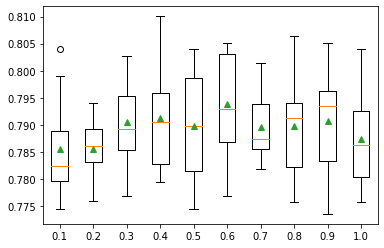

In [61]:
# getting a list of models to evaluate by changing the size of max_samples (hyperparameter tuning)
def get_models():
    models = dict()
    # exploring ratios from 10% to 100% in 10% increments
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None for 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    kf = StratifiedKFold(n_splits=10) #k_fold cross validation
    # evaluating the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
    return scores

# Defining the dataset (i.e., choosing X and y)
y = train_cl_en['TARGET_FLAG']
X = train_cl_en.drop(columns=['TARGET_FLAG','TARGET_AMT'])
print('Shape of X :',X.shape,'\nShape of y:',y.shape)

# getting the models to evaluate
models = get_models()

# evaluating the models and store results
results = []
names = []
for name, model in models.items():
    scores = evaluate_model(model, X, y) #evaluate the model
    results.append(scores) #store the results
    names.append(name) #store the names

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

From the above boxplot, it is clear that the model performs best when max_samples is around 60%. Hence, we build a single model on the entire dataset using all the predictors. We then check out the importance of each input variable in predicting the given target.

In [62]:
kf = StratifiedKFold(n_splits=10)
rfc = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,max_features='sqrt',max_leaf_nodes=None,min_impurity_decrease=0.0,
    bootstrap=True,oob_score=False,n_jobs=-1,random_state=0,verbose=0,warm_start=False,class_weight='balanced',max_samples=0.6)
target_pred = []
target_test = []
feat_importances = []
for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #split X into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #split y into training and testing sets
    model = rfc.fit(X_train, y_train) #learn and fit the model
    pred = model.predict(X_test) #use the model to predict
    target_pred.append(pred) # store predicted values for evaluation
    target_test.append(np.array(y_test)) #convert y to array before appending
    importance_fold = model.feature_importances_
    feat_importances.append(importance_fold)
target_pred = np.concatenate((np.array(target_pred, dtype=object)))
target_test = np.concatenate((np.array(target_test, dtype=object)))
feat_importances = np.array(feat_importances, dtype=object)

In [63]:
# creating a dataframe with the values of feature importances from the 10 folds
df_imp = pd.DataFrame(feat_importances.T,index=list(X))

# visualizing the dataframe
df_imp

,0,1,2,3,4,5,6,7,8,9
KIDSDRIV,0.016265,0.016068,0.01492,0.014267,0.01483,0.013672,0.013907,0.01245,0.014412,0.015439
AGE,0.062363,0.061878,0.063089,0.063296,0.060009,0.060209,0.062549,0.062449,0.061679,0.063651
HOMEKIDS,0.021577,0.021603,0.023236,0.022989,0.022863,0.023189,0.020938,0.022246,0.023554,0.02175
YOJ,0.04519,0.04606,0.046865,0.044564,0.045975,0.044553,0.045406,0.04659,0.046114,0.045332
INCOME,0.080328,0.077363,0.080926,0.081347,0.076389,0.08129,0.080075,0.078279,0.079419,0.080774
HOME_VAL,0.065981,0.064473,0.064125,0.06576,0.066604,0.06728,0.065188,0.067659,0.067256,0.064176
TRAVTIME,0.071142,0.069965,0.066581,0.067878,0.068167,0.067602,0.066715,0.067923,0.067573,0.067863
BLUEBOOK,0.073944,0.073746,0.073661,0.075324,0.07324,0.072745,0.074413,0.07696,0.07467,0.071505
TIF,0.042667,0.041109,0.042504,0.044101,0.043309,0.043448,0.042449,0.043956,0.042905,0.042284
OLDCLAIM,0.054498,0.054256,0.05417,0.05288,0.055125,0.052402,0.050957,0.049963,0.048576,0.053002


The confusion matrix (or contingency table) is a way to visualize model performance. It shows how the model performs under various scenarios. Below is a classic confusion matrix. 
![Confusion matrix](confusion_matrix.png)
If the model predicts a yes for an event to occur, and the event actually occurs, then it is hit (or true positive). If the model predicts a no for an event, and the event does not occur, then it is a correct rejection (or true negative). 
On the other hand, if the model predicts an event to occur, and the event does not occur in reality, then it is either a false positive. If the model predicts a no for an event, and the evnt actually occurs, then it is a miss.

Ideally, a good model should have zero case of false positive or false negative.

Four important attributes can be derived from the confusion matrix. They are:
1. _Proportion correct_: It is the probability of obtaining correct predictions. It is a measure of accuracy. The higher the proportion correct, the more accurate is the model.
2. _Hit rate_: It is a ratio of the yes-observations that were correctly predicted. The higher the hit rate, the better is the model.
3. _False alarm rate_: It is the ratio of false alarms to the total number of non-occurrences of the event. The lower the false alarm rate, the better is the model.
4. _Bias_: It is the ratio of the number of "yes" forecasts to the number of "yes" observations. Unbiased models have a bias of 1, indicating that the event was forecast the same number of times as it was observed.  

In [64]:
conf_mat = confusion_matrix(target_test, target_pred)
print('Confusion matrix:\n',conf_mat)
print('\nProportion correct =',(conf_mat[0,0] + conf_mat[1,1])/conf_mat.sum())
print('\nHit rate =',conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0]))
print('\nFalse alarm rate =',conf_mat[0,1]/(conf_mat[0,1]+conf_mat[1,1]))
print('\nModel bias =',(conf_mat[0,0]+conf_mat[0,1])/(conf_mat[0,0]+conf_mat[1,0]))

Confusion matrix:
 [[5678  330]
 [1399  754]]

Proportion correct = 0.7881387084916064

Hit rate = 0.8023173661155857

False alarm rate = 0.3044280442804428

Model bias = 0.8489472940511517


In [65]:
# obtaining mean of importances across 10 folds
df_imp.mean(axis=1)

KIDSDRIV                            0.014623
AGE                                 0.062117
HOMEKIDS                            0.022395
YOJ                                 0.045665
INCOME                              0.079619
HOME_VAL                            0.065850
TRAVTIME                            0.068141
BLUEBOOK                            0.074021
TIF                                 0.042873
OLDCLAIM                            0.052583
CLM_FREQ                            0.041264
MVR_PTS                             0.043865
CAR_AGE                             0.046241
PARENT1_No                          0.008681
PARENT1_Yes                         0.008186
MSTATUS_Yes                         0.011090
MSTATUS_z_No                        0.010154
SEX_M                               0.008182
SEX_z_F                             0.008055
EDUCATION_<High School              0.007320
EDUCATION_Bachelors                 0.009659
EDUCATION_Masters                   0.008614
EDUCATION_

Visualizing the importance of features

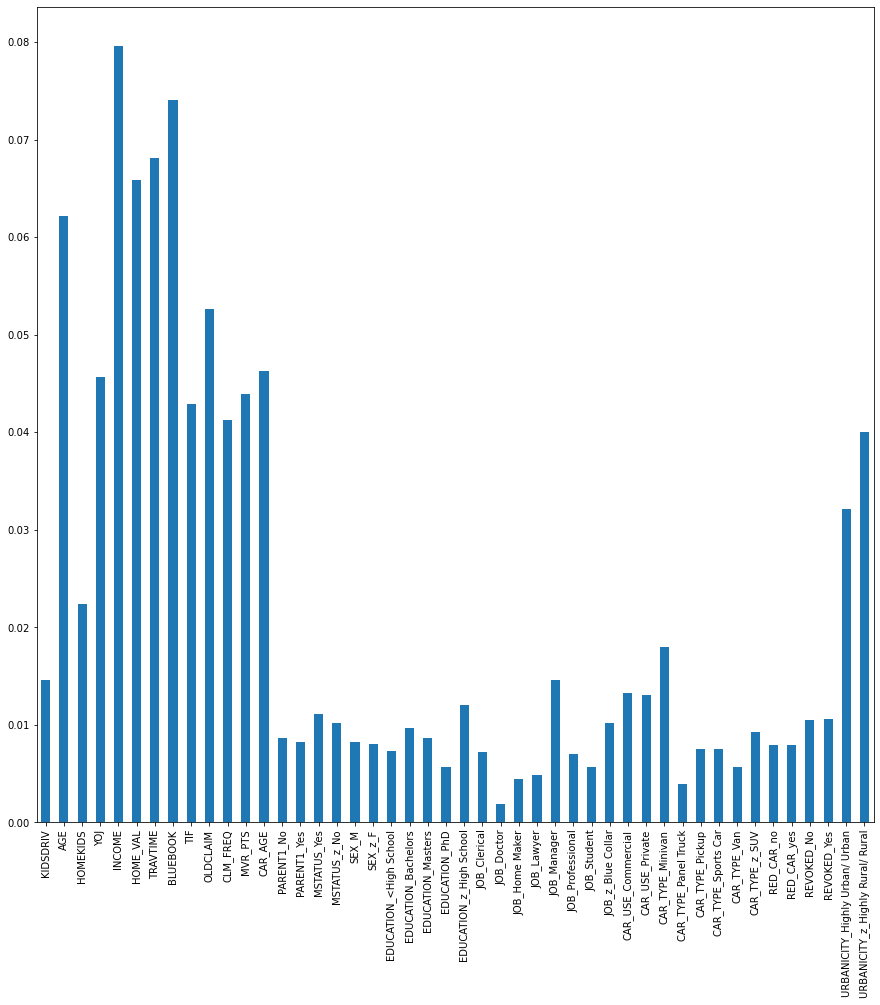

In [66]:
plot = df_imp.mean(axis=1).plot.bar(figsize=(15, 15))

As it turns out, the five most important variables for predicting TARGET_FLAG are INCOME, BLUEBOOK, TRAVTIME, HOME_VAL, and AGE, respectively.

From the above pie chart, it is clear that a vast majority of input features have very little importance in terms of their contribution to prediction of the target. Hence, we carry out truncation of the input sample space to retain a subset of input predictors that have at least an importance of 1%.

In [67]:
# determining the predictors that contribute at least 1% to the prediction of the target
df_imp.mean(axis=1)[(df_imp.mean(axis=1) > 0.01)]

KIDSDRIV                            0.014623
AGE                                 0.062117
HOMEKIDS                            0.022395
YOJ                                 0.045665
INCOME                              0.079619
HOME_VAL                            0.065850
TRAVTIME                            0.068141
BLUEBOOK                            0.074021
TIF                                 0.042873
OLDCLAIM                            0.052583
CLM_FREQ                            0.041264
MVR_PTS                             0.043865
CAR_AGE                             0.046241
MSTATUS_Yes                         0.011090
MSTATUS_z_No                        0.010154
EDUCATION_z_High School             0.012055
JOB_Manager                         0.014566
JOB_z_Blue Collar                   0.010165
CAR_USE_Commercial                  0.013275
CAR_USE_Private                     0.013078
CAR_TYPE_Minivan                    0.018021
REVOKED_No                          0.010471
REVOKED_Ye

We have retained a set of 23 variables for the second case.

In [68]:
# obtaining a list of the retained predictors
imp_feat = list(df_imp.mean(axis=1)[(df_imp.mean(axis=1) > 0.01)].index)
imp_feat

['KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME',
 'HOME_VAL',
 'TRAVTIME',
 'BLUEBOOK',
 'TIF',
 'OLDCLAIM',
 'CLM_FREQ',
 'MVR_PTS',
 'CAR_AGE',
 'MSTATUS_Yes',
 'MSTATUS_z_No',
 'EDUCATION_z_High School',
 'JOB_Manager',
 'JOB_z_Blue Collar',
 'CAR_USE_Commercial',
 'CAR_USE_Private',
 'CAR_TYPE_Minivan',
 'REVOKED_No',
 'REVOKED_Yes',
 'URBANICITY_Highly Urban/ Urban',
 'URBANICITY_z_Highly Rural/ Rural']

**_The Random Forest model: Case-2 (using a subset of 14 important predictors)_**

In [69]:
target_pred = []
target_test = []
feat_importances = []
for train_index,test_index in kf.split(X[imp_feat],y):
    X_train, X_test = X[imp_feat].iloc[train_index], X[imp_feat].iloc[test_index] #split X into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #split y into training and testing sets
    model = rfc.fit(X_train, y_train) #learn and fit the model
    pred = model.predict(X_test) #use the model to predict
    target_pred.append(pred) # store predicted values for evaluation
    target_test.append(np.array(y_test)) #convert y to array before appending
    importance_fold = model.feature_importances_
    feat_importances.append(importance_fold)
target_pred = np.concatenate((np.array(target_pred, dtype=object)))
target_test = np.concatenate((np.array(target_test, dtype=object)))
feat_importances = np.array(feat_importances, dtype=object)

In [70]:
conf_mat = confusion_matrix(target_test, target_pred)
print('Confusion matrix:\n',conf_mat)
print('\nProportion correct =',(conf_mat[0,0] + conf_mat[1,1])/conf_mat.sum())
print('\nHit rate =',conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0]))
print('\nFalse alarm rate =',conf_mat[0,1]/(conf_mat[0,1]+conf_mat[1,1]))
print('\nModel bias =',(conf_mat[0,0]+conf_mat[0,1])/(conf_mat[0,0]+conf_mat[1,0]))

Confusion matrix:
 [[5659  349]
 [1388  765]]

Proportion correct = 0.7871584364661194

Hit rate = 0.8030367532283241

False alarm rate = 0.3132854578096948

Model bias = 0.8525613736341706


Take away messages from the above two experiments:
1. Not all input variables carry valuable information for predicting the target. 
2. The assumptions made about missing values of certain variables during data processing need to be revisited to carefully take into account missing values. However, this is out of the scope of this preoject.
2. Truncating the input sample space as shown above hardly changes the predictive power of the model.

---
# 4. Testing

In [71]:
# importing the test data
test = pd.read_csv('/home/ngoutham/Downloads/DSP/test_auto.csv')
print(test.shape)
test.head()

(2141, 26)


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [72]:
# finding the number of missing values in each column
pd.DataFrame(data=test.isnull().sum().values,index=test.isnull().sum().index).T

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,2141,2141,0,1,0,94,125,0,111,0,0,0,139,0,0,0,0,0,0,0,0,0,0,129,0


In [73]:
# Data cleanup
test['AGE'].fillna(test['AGE'].mode()[0], inplace = True)
test['YOJ'].fillna(test['YOJ'].mean(), inplace = True)
test['INCOME'] = test['INCOME'].replace({'\$':'','\,':''}, regex=True).astype(float)
test['INCOME'].fillna(test['INCOME'].mean(), inplace = True)
test['HOME_VAL'] = test['HOME_VAL'].replace({'\$':'','\,':''}, regex=True).astype(float)
test['HOME_VAL'].fillna(test['HOME_VAL'].mean(), inplace = True)
test['JOB'].fillna('z_Blue Collar', inplace = True)
test['CAR_AGE'].fillna(test['CAR_AGE'].mode()[0], inplace = True)

# finding the number of missing values in each column
pd.DataFrame(data=test.isnull().sum().values,index=test.isnull().sum().index).T

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,2141,2141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# encoding
test_cl_en = pd.get_dummies(test,columns=['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'],drop_first=False)
test_cl_en = test_cl_en.drop(columns='INDEX')

In [75]:
test_cl_en['INCOME'] = (test_cl_en['INCOME'] - test_cl_en['INCOME'].mean())/test_cl_en['INCOME'].std()
test_cl_en['HOME_VAL'] = (test_cl_en['HOME_VAL'] - test_cl_en['HOME_VAL'].mean())/test_cl_en['HOME_VAL'].std()
test_cl_en['BLUEBOOK'] = test_cl_en['BLUEBOOK'].replace({'\$':'','\,':''}, regex=True).astype(float)
test_cl_en['BLUEBOOK'] = (test_cl_en['BLUEBOOK'] - test_cl_en['BLUEBOOK'].mean())/test_cl_en['BLUEBOOK'].std()
test_cl_en['OLDCLAIM'] = test_cl_en['OLDCLAIM'].replace({'\$':'','\,':''}, regex=True).astype(float)
test_cl_en['OLDCLAIM'] = (test_cl_en['OLDCLAIM'] - test_cl_en['OLDCLAIM'].mean())/test_cl_en['OLDCLAIM'].std()
test_cl_en['TARGET_AMT'] = (test_cl_en['TARGET_AMT'] - test_cl_en['TARGET_AMT'].mean())/test_cl_en['TARGET_AMT'].std()
test_cl_en['AGE'] = (test_cl_en['AGE'] - test_cl_en['AGE'].mean())/test_cl_en['AGE'].std()
test_cl_en['YOJ'] = (test_cl_en['YOJ'] - test_cl_en['YOJ'].mean())/test_cl_en['YOJ'].std()
test_cl_en['TRAVTIME'] = (test_cl_en['TRAVTIME'] - test_cl_en['TRAVTIME'].mean())/test_cl_en['TRAVTIME'].std()
test_cl_en['TIF'] = (test_cl_en['TIF'] - test_cl_en['TIF'].mean())/test_cl_en['TIF'].std()
test_cl_en['CLM_FREQ'] = (test_cl_en['CLM_FREQ'] - test_cl_en['CLM_FREQ'].mean())/test_cl_en['CLM_FREQ'].std()
test_cl_en['MVR_PTS'] = (test_cl_en['MVR_PTS'] - test_cl_en['MVR_PTS'].mean())/test_cl_en['MVR_PTS'].std()
test_cl_en['CAR_AGE'] = (test_cl_en['CAR_AGE'] - test_cl_en['CAR_AGE'].mean())/test_cl_en['CAR_AGE'].std()
pd.DataFrame(data=test_cl_en.dtypes.values,index=test_cl_en.dtypes.index).T

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,SEX_M,SEX_z_F,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8


In [76]:
# finding the number of missing values in each column
pd.DataFrame(data=test_cl_en.isnull().sum().values,index=test_cl_en.isnull().sum().index).T

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,SEX_M,SEX_z_F,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,2141,2141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# Choosing X_test
X_test = test_cl_en[imp_feat]
print('Shape of X_test :',X_test.shape)

Shape of X_test : (2141, 25)


In [78]:
model = rfc.fit(X[imp_feat],y)
test_flag = model.predict(X_test)
df_tf = pd.DataFrame({'TARGET_FLAG':test_flag},index=test['INDEX'])
df_tf.head()

,TARGET_FLAG
INDEX,
3,0
9,0
10,0
18,0
21,0


In [79]:
df_tf.to_csv('/home/ngoutham/Downloads/DSP/target_flag_predicted.csv')

---
# 5. Conclusions

1. Not all the input variables bring in valuable information for predicting target_flag.
2. The assumptions made to account for the missing values need to be revisited. This can be done by building a model to predict those missing values.
3. Further improvement of the model requires the tuning of other hyperparameters.